In [2]:
import pandas as pd
housing = pd.read_csv("../data/housing.csv")

In [3]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

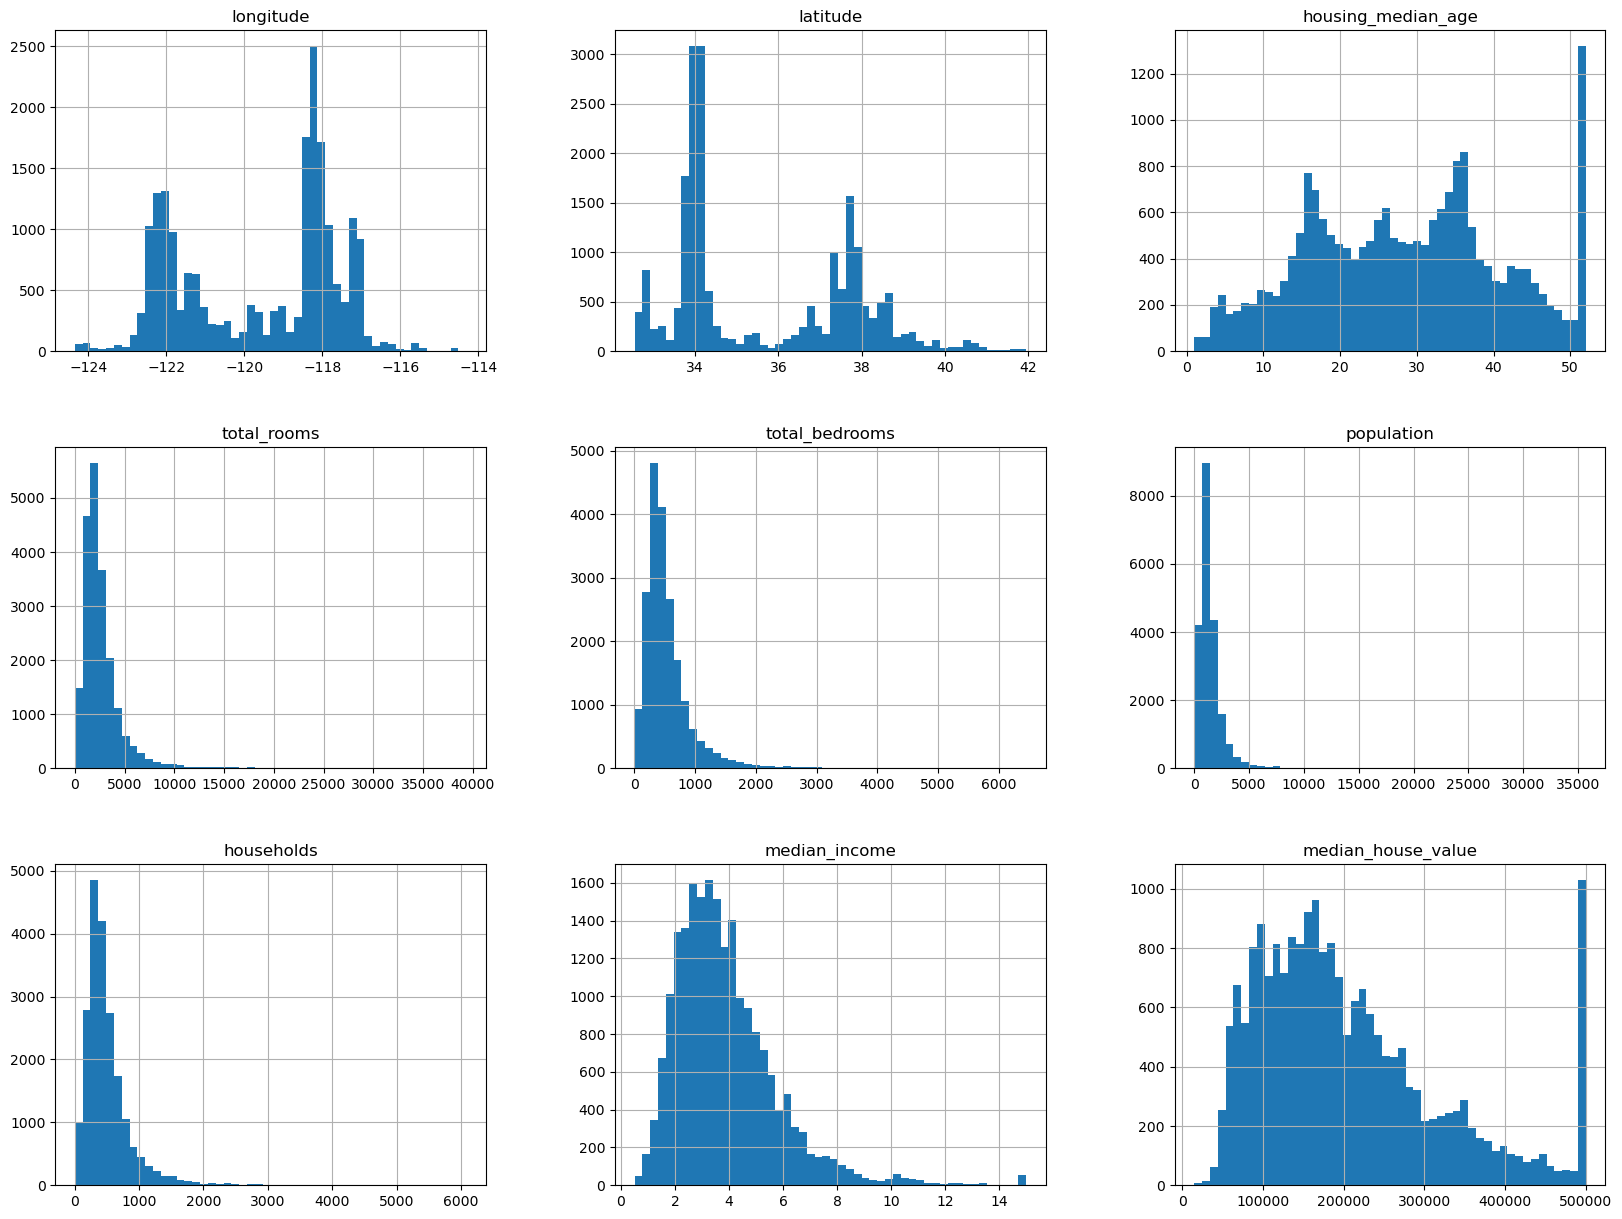

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [8]:
# Not used because stratified sampling is done later
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [9]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

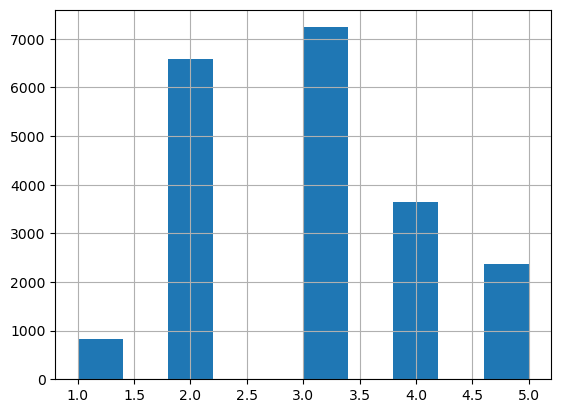

In [10]:
housing["income_cat"].hist()

In [11]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,
                                                   stratify=housing['income_cat'],
                                                   random_state=42)

In [12]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     473
1     164
Name: income_cat, dtype: int64

In [13]:
strat_train_set = strat_train_set.drop('income_cat', axis=1)
strat_test_set = strat_test_set.drop('income_cat', axis=1)

In [14]:
housing=strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

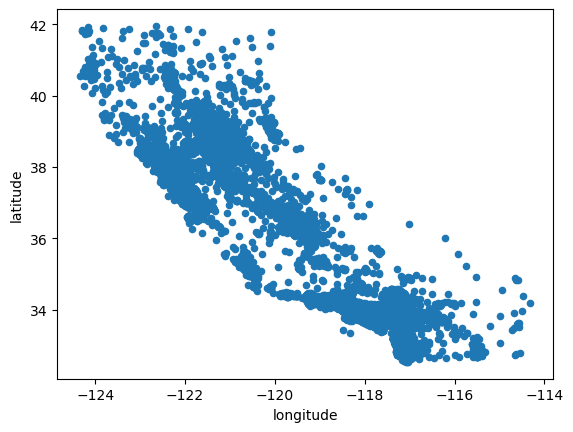

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

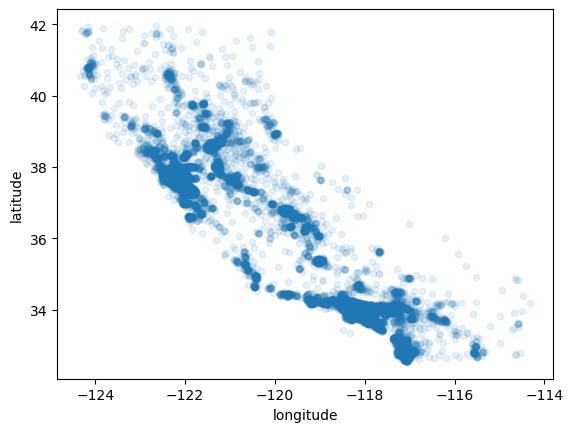

In [16]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

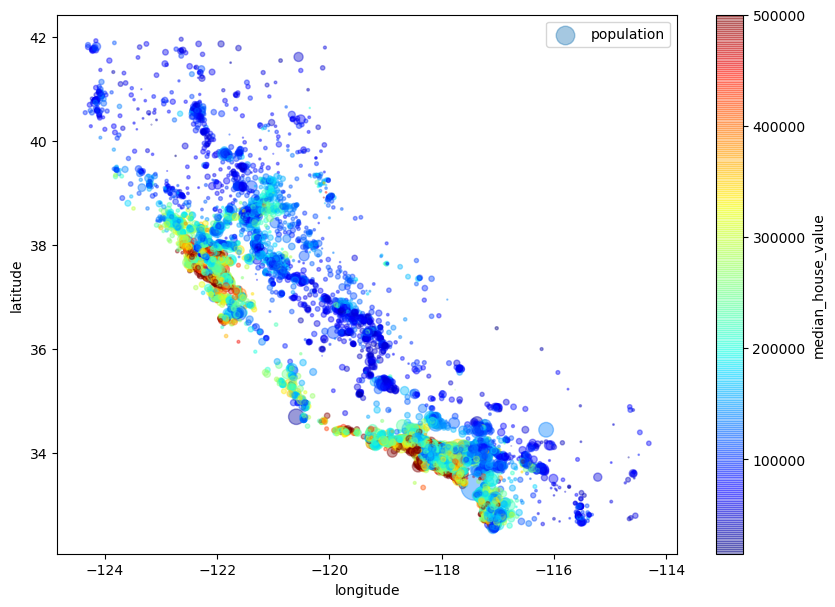

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [18]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [19]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

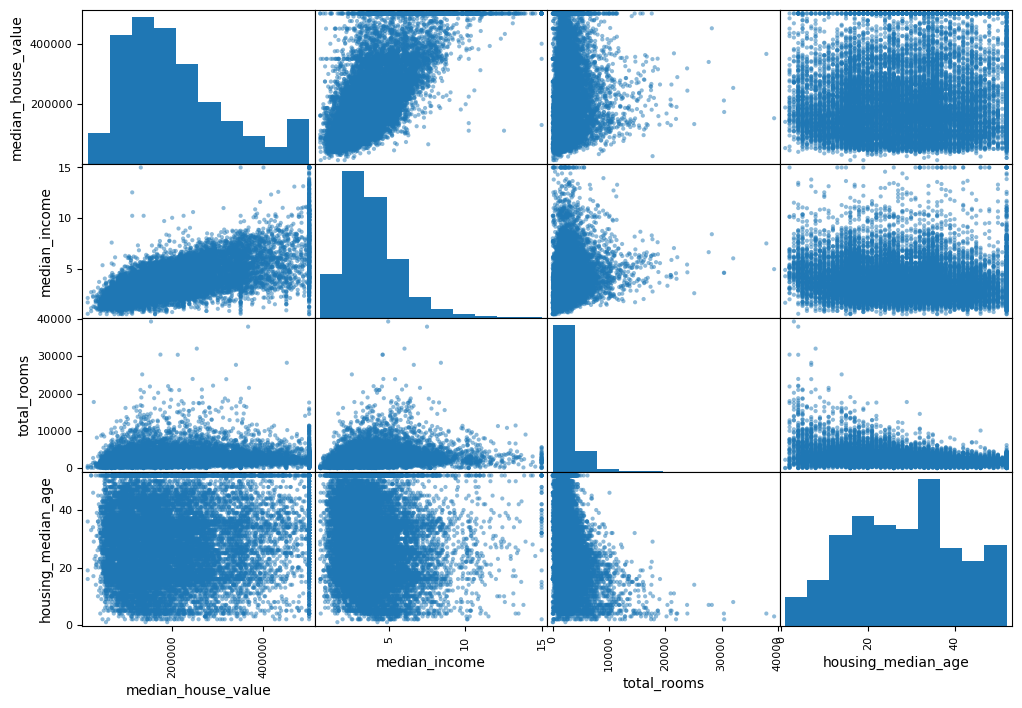

In [20]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income',
              'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

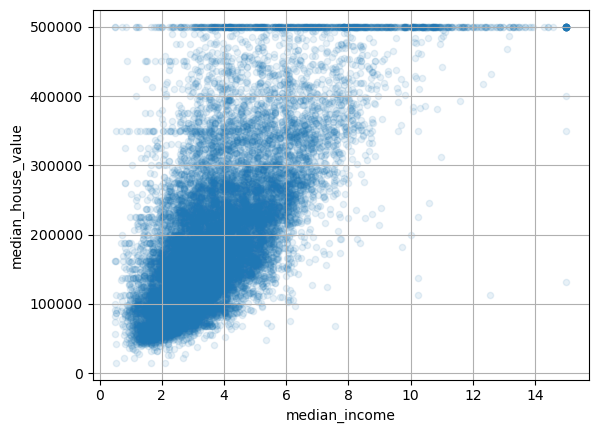

In [21]:
housing.plot(kind='scatter', x='median_income',
             y='median_house_value', alpha=0.1, grid=True)

In [22]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [23]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
17606       <1H OCEAN             4.625369           0.223852   
18632       <1H OCEAN             6.008850           0.159057   
14650      NEAR OCEAN             4.225108           0.241291   
3230           INLAND             5.232295           0.200866   
3555        <1H OCEAN             4.505810           0.231341   

       population_per_household  
17606                  2.094395  
18632                  2.707965  
14650                  2.025974  
3230                   4.135977  
3555                   3.047847

In [24]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [25]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [28]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [29]:
housing_tr.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_tr = scaler.fit_transform(housing_tr)

In [31]:
type(housing_tr)

numpy.ndarray

In [32]:
housing_tr = pd.DataFrame(housing_tr, columns=housing_num.columns, index=housing_num.index)
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606  -1.156043  0.771950            0.743331    -0.493234       -0.445438   
18632  -1.176025  0.659695           -1.165317    -0.908967       -1.036928   
14650   1.186849 -1.342183            0.186642    -0.313660       -0.153345   
3230   -0.017068  0.313576           -0.290520    -0.362762       -0.396756   
3555    0.492474 -0.659299           -0.926736     1.856193        2.412211   

       population  households  median_income  
17606   -0.636211   -0.420698      -0.614937  
18632   -0.998331   -1.022227       1.336459  
14650   -0.433639   -0.093318      -0.532046  
3230     0.036041   -0.383436      -1.045566  
3555     2.724154    2.570975      -0.441437

In [33]:
housing_tr.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  1.651200e+04  1.651200e+04        1.651200e+04  1.651200e+04   
mean  -4.353107e-15  2.284564e-15       -4.701235e-17  7.587062e-17   
std    1.000030e+00  1.000030e+00        1.000030e+00  1.000030e+00   
min   -2.384937e+00 -1.449760e+00       -2.199168e+00 -1.223689e+00   
25%   -1.111083e+00 -7.949406e-01       -8.472092e-01 -5.516890e-01   
50%    5.324379e-01 -6.452675e-01        2.758786e-02 -2.353301e-01   
75%    7.822131e-01  9.730728e-01        6.638039e-01  2.423650e-01   
max    2.630550e+00  2.951564e+00        1.856709e+00  1.716114e+01   

       total_bedrooms    population    households  median_income  
count    1.651200e+04  1.651200e+04  1.651200e+04   1.651200e+04  
mean     1.360615e-16 -3.700743e-17  2.078979e-17  -2.076289e-16  
std      1.000030e+00  1.000030e+00  1.000030e+00   1.000030e+00  
min     -1.294944e+00 -1.269921e+00 -1.317668e+00  -1.772116e+00  
25%     -5.793145e-01 -5.698825e-01 -5.803963e-01  -6.870806e-01  
50%     -2.458409e-01 -2.292746e-01 -2.370459e-01  -1.756999e-01  
75%      2.604547e-01  2.684162e-01  2.793106e-01   4.561338e-01  
max      1.381603e+01  3.071047e+01  1.293803e+01   5.839969e+00

In [34]:
ocean_proximity_one_hot = pd.get_dummies(housing.ocean_proximity)
housing_tr = pd.concat([housing_tr, ocean_proximity_one_hot], axis=1)

In [35]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606  -1.156043  0.771950            0.743331    -0.493234       -0.445438   
18632  -1.176025  0.659695           -1.165317    -0.908967       -1.036928   
14650   1.186849 -1.342183            0.186642    -0.313660       -0.153345   
3230   -0.017068  0.313576           -0.290520    -0.362762       -0.396756   
3555    0.492474 -0.659299           -0.926736     1.856193        2.412211   

       population  households  median_income  <1H OCEAN  INLAND  ISLAND  \
17606   -0.636211   -0.420698      -0.614937          1       0       0   
18632   -0.998331   -1.022227       1.336459          1       0       0   
14650   -0.433639   -0.093318      -0.532046          0       0       0   
3230     0.036041   -0.383436      -1.045566          0       1       0   
3555     2.724154    2.570975      -0.441437          1       0       0   

       NEAR BAY  NEAR OCEAN  
17606         0           0  
18632         0           0  
14650         0           1  
3230          0           0  
3555          0           0

In [36]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_tr, housing_labels)

LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_tr)
lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
print("Error on training data:", lin_rmse)

Error on training data: 69050.98178244587
